In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer  # Correct import for Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas as pd  # Use 'pd' as the alias for pandas

np.random.seed(10)
print(tf.__version__)


2.18.0


In [12]:
data = pd.read_csv('colors.csv')
data.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [14]:
len(data)

14157

In [16]:
names = data["name"]

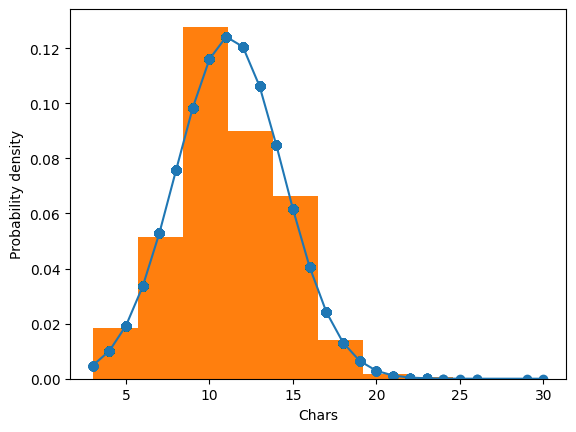

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pylab as plt

# Assuming 'names' is a pandas Series containing strings
h = sorted(names.str.len().to_numpy())  # Use .to_numpy() instead of .as_matrix()

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  # Fit the normal distribution
plt.plot(h, fit, '-o')
plt.hist(h, density=True)  # 'normed' is deprecated, use 'density' instead
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()


In [22]:
np.array(h).max()

30

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Correct import for pad_sequences

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = pad_sequences(tokenized, maxlen=maxlen)  # Correct usage of pad_sequences


In [30]:
from tensorflow.keras.utils import to_categorical  # Correct import for to_categorical

one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes


28

In [32]:
one_hot_names.shape

(14157, 25, 28)

In [34]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [36]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])

In [38]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

C:\Users\gowri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 81s 176ms/step - acc: 0.5638 - loss: 0.0648 - val_acc: 0.6667 - val_loss: 0.0617
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 66s 166ms/step - acc: 0.6563 - loss: 0.0569 - val_acc: 0.6610 - val_loss: 0.0558
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 64s 160ms/step - acc: 0.6636 - loss: 0.0526 - val_acc: 0.6462 - val_loss: 0.0537
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 63s 159ms/step - acc: 0.6685 - loss: 0.0496 - val_acc: 0.6935 - val_loss: 0.0510
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 67s 167ms/step - acc: 0.6713 - loss: 0.0468 - val_acc: 0.7027 - val_loss: 0.0508
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 60s 151ms/step - acc: 0.6831 - loss: 0.0451 - val_acc: 0.6681 - val_loss: 0.0489
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 64s 159ms/step - acc: 0.6888 - loss: 0.0429 - val_acc: 0.6970 - val_loss: 0.0465
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 64s 160ms/step - acc: 0.6832 - loss: 0.0404 - val_acc: 0.6688 - val_loss: 0.0454
Epoch 9/40
399/399 ━━━━━━━━━━━━━

In [44]:
# Optionally continue to train with all data, this will likely overfit the training data.
model.fit(one_hot_names, normalized_values,
                    epochs=10,
                    batch_size=32) 

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 68s 154ms/step - acc: 0.8038 - loss: 0.0111 
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 69s 156ms/step - acc: 0.8085 - loss: 0.0089 
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 68s 153ms/step - acc: 0.8263 - loss: 0.0068 
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 68s 154ms/step - acc: 0.8269 - loss: 0.0063 
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 69s 154ms/step - acc: 0.8305 - loss: 0.0059 
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 69s 155ms/step - acc: 0.8377 - loss: 0.0059 
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 70s 157ms/step - acc: 0.8349 - loss: 0.0056 
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 75s 170ms/step - acc: 0.8450 - loss: 0.0055 
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 70s 159ms/step - acc: 0.8448 - loss: 0.0055 
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 70s 158ms/step - acc: 0.8495 - loss: 0.0054 


In [47]:
model.save_weights('model_1.weights.h5')
model.load_weights('model_1.weights.h5')

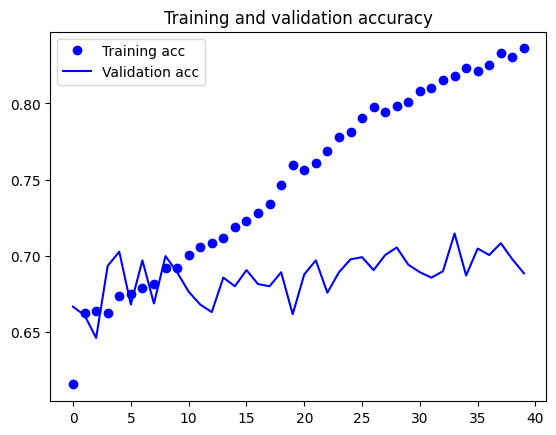

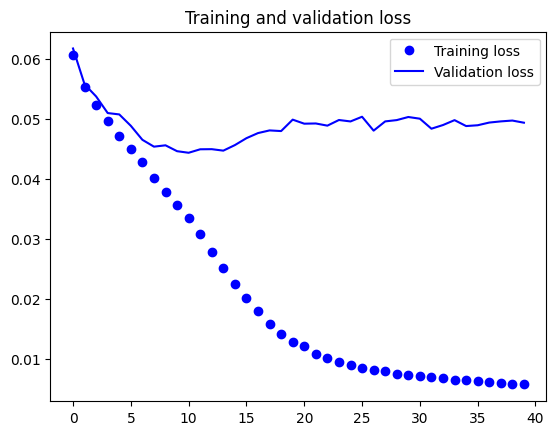

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [53]:
def scale(n):
    return int(n * 255)

In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Correct import
from tensorflow.keras.utils import to_categorical  # Correct import for to_categorical

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = pad_sequences(tokenized, maxlen=maxlen)  # Use pad_sequences directly
    one_hot = to_categorical(padded, num_classes=num_classes)  # Use to_categorical correctly
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
light blue, R,G,B: 178 214 242


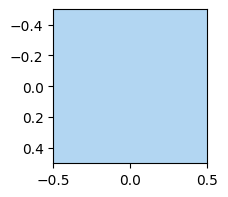

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
blue, R,G,B: 5 32 201


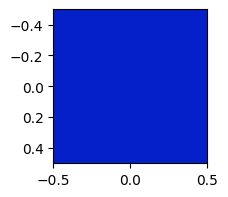

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
dark blue, R,G,B: 3 10 118


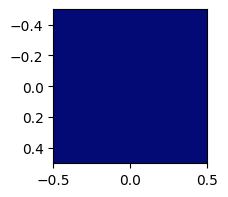

In [65]:
predict("light blue")
predict("blue")
predict("dark blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
black, R,G,B: 17 25 32


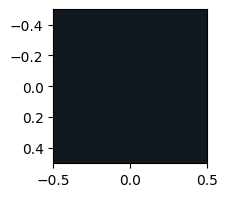

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
white, R,G,B: 244 237 228


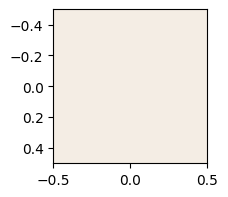

In [67]:
predict("black")
predict("white")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
tensorflow orange, R,G,B: 240 133 64


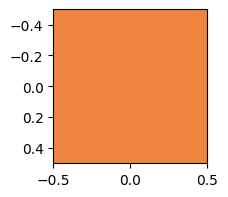

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
forest, R,G,B: 26 86 42


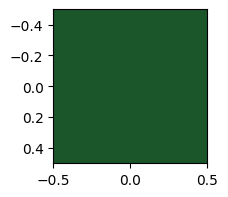

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
evergreen, R,G,B: 30 66 27


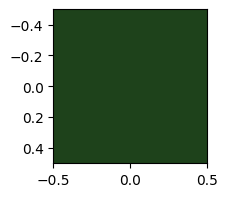

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
tangerine, R,G,B: 248 152 44


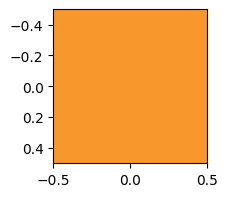

In [69]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
princess ivory, R,G,B: 247 228 207


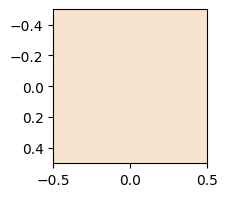

In [71]:
predict("princess ivory")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
bull cream, R,G,B: 218 204 207


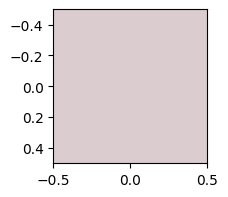

In [73]:
predict("bull cream")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
keras red, R,G,B: 142 65 72


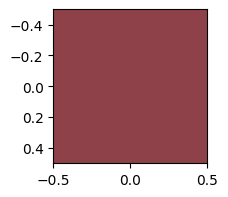

In [75]:
predict("keras red")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
tensorflow orange, R,G,B: 240 133 64


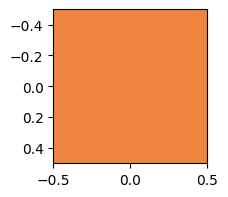

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
forest, R,G,B: 26 86 42


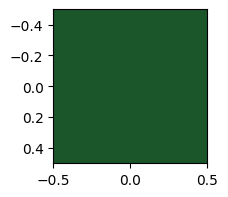

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
bull cream, R,G,B: 218 204 207


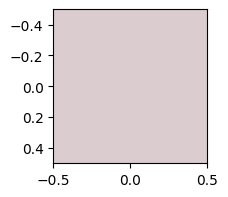

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
keras red, R,G,B: 142 65 72


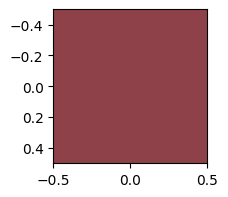

In [77]:
predict("tensorflow orange")
predict("forest")
predict("bull cream")
predict("keras red")